In [1]:
import os
import cv2
import numpy as np
from evaluation import gan_eval
import matplotlib.pyplot as plt

In [2]:
# Function to display 10 samples from a list
def show_samples(images, title):
    idx = np.array([np.random.choice(len(images),5)]).flatten()
    plt.figure(figsize=(15, 5))
    for i in range(5):
        if i < len(images):
            plt.subplot(1, 5, i + 1)
            plt.imshow(images[idx[i]], cmap='gray')  # Show grayscale images
            plt.title(f"{title} {i + 1}")
            plt.axis('off')
    plt.show()

Paint Images:


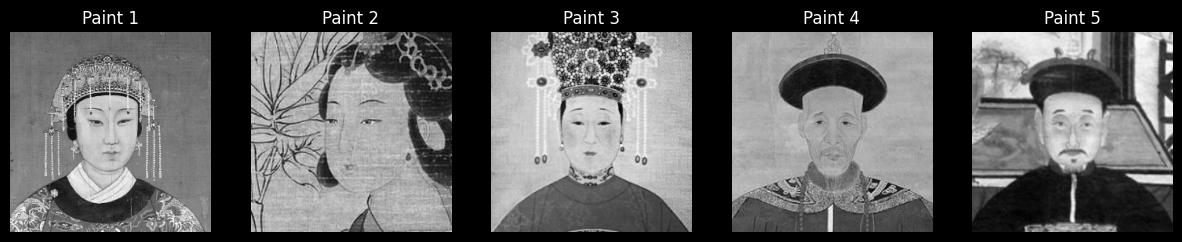

Fake Images:


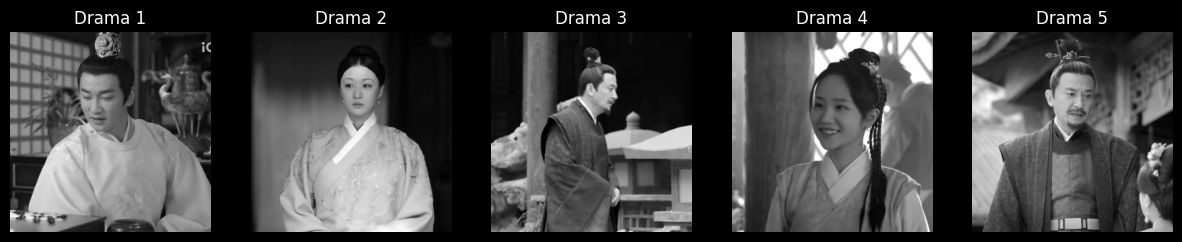

In [3]:
image_dir = './images'
paint_images = []

# Read filenames and categorize
for filename in os.listdir(image_dir):
    filepath = os.path.join(image_dir, filename)
    if os.path.isfile(filepath):
        img = cv2.imread(filepath)
        if img is not None:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            paint_images.append(gray_img)

image_dir = './resized'

drama_images = []
for filename in os.listdir(image_dir):
    filepath = os.path.join(image_dir, filename)
    if os.path.isfile(filepath):
        img = cv2.imread(filepath)
        if img is not None:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            drama_images.append(gray_img)


print("Paint Images:")
show_samples(paint_images, 'Paint')
print("Fake Images:")
show_samples(drama_images, 'Drama')

# Paint Evaluation

In [4]:
print('Paint Evaluation\n')
checkpoints = [250*i for i in range(7)]
for check in checkpoints:
    image_dir = f'./checkpoints/checkpoint{check}'
    check_images = []
    for filename in os.listdir(image_dir):
        filepath = os.path.join(image_dir, filename)
        if os.path.isfile(filepath):
            img = cv2.imread(filepath)
            if img is not None:
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                check_images.append(gray_img)

    print(f'{check} epoch checkpoint')
    gan_eval(paint_images,check_images)
    print()

Paint Evaluation

0 epoch checkpoint
Result:
Bhattacharyya distance : 0.17518335
D1 distance : 0.32930908
D2 distance : 0.02541473
D4 distance : 0.06468396
D6 distance : 0.00007807

250 epoch checkpoint
Result:
Bhattacharyya distance : 0.18202804
D1 distance : 0.37293091
D2 distance : 0.02962823
D4 distance : 0.09956595
D6 distance : 0.00011124

500 epoch checkpoint
Result:
Bhattacharyya distance : 0.20743606
D1 distance : 0.49696228
D2 distance : 0.03672038
D4 distance : 0.17360120
D6 distance : 0.00006662

750 epoch checkpoint
Result:
Bhattacharyya distance : 0.31754586
D1 distance : 0.76647278
D2 distance : 0.05453207
D4 distance : 0.31118047
D6 distance : 0.00024541

1000 epoch checkpoint
Result:
Bhattacharyya distance : 0.31683507
D1 distance : 0.75861511
D2 distance : 0.05488157
D4 distance : 0.30771065
D6 distance : 0.00016322

1250 epoch checkpoint
Result:
Bhattacharyya distance : 0.29754062
D1 distance : 0.71632141
D2 distance : 0.05125937
D4 distance : 0.29389750
D6 distance 

# Drama Evaluation

In [5]:
print('Drama Evaluation\n')
checkpoints = [250*i for i in range(7)]
for check in checkpoints:
    image_dir = f'./checkpoints/checkpoint{check}'
    check_images = []
    for filename in os.listdir(image_dir):
        filepath = os.path.join(image_dir, filename)
        if os.path.isfile(filepath):
            img = cv2.imread(filepath)
            if img is not None:
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                check_images.append(gray_img)

    print(f'{check} epoch checkpoint')
    gan_eval(drama_images,check_images)
    print()

Drama Evaluation

0 epoch checkpoint
Result:
Bhattacharyya distance : 0.29193665
D1 distance : 0.67907334
D2 distance : 0.04887372
D4 distance : 0.29971164
D6 distance : 0.00008644

250 epoch checkpoint
Result:
Bhattacharyya distance : 0.23286730
D1 distance : 0.46742228
D2 distance : 0.04001866
D4 distance : 0.20530302
D6 distance : 0.00015472

500 epoch checkpoint
Result:
Bhattacharyya distance : 0.18238643
D1 distance : 0.37243067
D2 distance : 0.03355273
D4 distance : 0.13998464
D6 distance : 0.00008752

750 epoch checkpoint
Result:
Bhattacharyya distance : 0.11906681
D1 distance : 0.25498209
D2 distance : 0.02113949
D4 distance : 0.04881400
D6 distance : 0.00007598

1000 epoch checkpoint
Result:
Bhattacharyya distance : 0.13930714
D1 distance : 0.30037371
D2 distance : 0.02651231
D4 distance : 0.06123120
D6 distance : 0.00002060

1250 epoch checkpoint
Result:
Bhattacharyya distance : 0.10757951
D1 distance : 0.22455470
D2 distance : 0.02085486
D4 distance : 0.04483090
D6 distance 

# Paired Evaluation

In [6]:
from evaluation import calculate_d1, calculate_d2, calculate_d4, calculate_BD

print('Paired Evaluation')
checkpoints = [250*i for i in range(7)]
for check in checkpoints:
    image_dir = f'./checkpoints/checkpoint{check}'
    filenames = os.listdir(image_dir)
    total_d1 = 0.0
    total_d2 = 0.0
    total_d4 = 0.0
    total_bd = 0.0
    for idx in range(len(filenames)):
        filepath = os.path.join(image_dir, filenames[idx])
        if os.path.isfile(filepath):
            img_x = paint_images[idx]
            img_g = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if img_g is not None:
                hist_x = np.squeeze(cv2.calcHist([img_x], mask=None, channels=[0], histSize=[256], ranges=[0,256]))
                hist_g = np.squeeze(cv2.calcHist([img_g], mask=None, channels=[0], histSize=[256], ranges=[0,256]))
                total_d1 += calculate_d1(hist_x,hist_g)
                total_d2 += calculate_d2(hist_x,hist_g)
                total_d4 += calculate_d4(hist_x,hist_g)
                total_bd += calculate_BD(hist_x,hist_g)

    print(f'{check} epoch checkpoint:')
    print('='*100,'\nResult')
    print('D1:',total_d1/len(filenames))
    print('D2:',total_d2/len(filenames))
    print('D4:',total_d4/len(filenames))
    print('BD:',total_bd/len(filenames))
    print('='*100)

Paired Evaluation
0 epoch checkpoint:
Result
D1: 0.8351434326171875
D2: 0.09882558457046436
D4: 0.1451799968332846
BD: 0.42685847835171825
250 epoch checkpoint:
Result
D1: 1.098353271484375
D2: 0.12451911540496903
D4: 0.2839353247316003
BD: 0.5158500248253737
500 epoch checkpoint:
Result
D1: 1.092850341796875
D2: 0.11958463317231888
D4: 0.29444241829069107
BD: 0.5188041839373261
750 epoch checkpoint:
Result
D1: 1.13203369140625
D2: 0.12106692607625767
D4: 0.3644225969985774
BD: 0.5550402436448892
1000 epoch checkpoint:
Result
D1: 1.1145751953125
D2: 0.11718099420255379
D4: 0.358815083159595
BD: 0.5351287152841305
1250 epoch checkpoint:
Result
D1: 1.0857366943359374
D2: 0.11447630769870255
D4: 0.3481371723719592
BD: 0.5224557997503837
1500 epoch checkpoint:
Result
D1: 1.0509576416015625
D2: 0.11003641325698851
D4: 0.34129316129770926
BD: 0.5005689244214088
